<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson05_MOPAC/%E3%80%9001%E3%80%91openbabel%E5%8F%8A%E3%81%B3pybel%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google driveへの接続

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# conda環境の構築

In [3]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [4]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [5]:
!python -V

Python 3.10.10


In [6]:
!conda install -c openbabel openbabel eigen -y

Solving environment: \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



In [7]:
# installしたversionの再確認など
!conda list openbabel

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
openbabel                 3.1.1           py310h956b46e_8    conda-forge


# openbabelとpybelの基本的な使い方

In [8]:
from openbabel import openbabel, pybel

In [9]:
# 読み込みフォーマットと出力のフォーマットの数
print(len(pybel.informats), len(pybel.outformats))

148 134


In [10]:
pybel.informats

{'abinit': 'ABINIT Output Format',
 'acesout': 'ACES output format',
 'acr': 'ACR format',
 'adfband': 'ADF Band output format',
 'adfdftb': 'ADF DFTB output format',
 'adfout': 'ADF output format',
 'alc': 'Alchemy format',
 'aoforce': 'Turbomole AOFORCE output format',
 'arc': 'Accelrys/MSI Biosym/Insight II CAR format',
 'axsf': 'XCrySDen Structure Format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c09out': 'Crystal 09 output format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'caccrt': 'Cacao Cartesian format',
 'can': 'Canonical SMILES format',
 'car': 'Accelrys/MSI Biosym/Insight II CAR format',
 'castep': 'CASTEP format',
 'ccc': 'CCC format',
 'cdjson': 'ChemDoodle JSON',
 'cdx': 'ChemDraw binary format',
 'cdxml': 'ChemDraw CDXML format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'cof': 'Culgi object

In [11]:
pybel.outformats

{'acesin': 'ACES input format',
 'adf': 'ADF cartesian input format',
 'alc': 'Alchemy format',
 'ascii': 'ASCII format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'cac': 'CAChe MolStruct format',
 'caccrt': 'Cacao Cartesian format',
 'cache': 'CAChe MolStruct format',
 'cacint': 'Cacao Internal format',
 'can': 'Canonical SMILES format',
 'cdjson': 'ChemDoodle JSON',
 'cdxml': 'ChemDraw CDXML format',
 'cht': 'Chemtool format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'cof': 'Culgi object file format',
 'com': 'Gaussian Input',
 'confabreport': 'Confab report format',
 'CONFIG': 'DL-POLY CONFIG',
 'CONTCAR': 'VASP format',
 'CONTFF': 'MDFF format',
 'copy': 'Copy raw text',
 'crk2d': 'Chemical Resource Kit diagram(2D)',
 'crk3d': 'Chemical Resource Kit 3D format',
 '

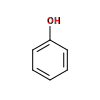

In [12]:
# smilesでの分子の読み込み
molecule = pybel.readstring("smiles", "C1=CC=C(C=C1)O")
molecule

In [13]:
# xyz座標での分子の出力
print(molecule.write("xyz"))

7

C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
O          0.00000        0.00000        0.00000



In [14]:
#openbabelを用いた構造最適化
molecule.make3D(forcefield='mmff94', steps=1000)
print(molecule.write("xyz"))

13

C         -1.87568        0.03410       -0.00510
C         -1.19721       -1.18589       -0.00406
C          0.19853       -1.21088        0.00192
C          0.90327       -0.01035        0.00680
C          0.23498        1.20891        0.00620
C         -1.15951        1.23167        0.00014
O          2.26679        0.01257        0.01210
H         -2.96253        0.05194       -0.00995
H         -1.75770       -2.11714       -0.00797
H          0.71278       -2.16634        0.00274
H          0.79829        2.13748        0.01025
H         -1.68618        2.18214       -0.00059
H          2.58978       -0.90307        0.00844



In [15]:
mopac_format = molecule.write("mop")
print(mopac_format)

PUT KEYWORDS HERE


C  -1.87568 1  0.03410 1 -0.00510 1
C  -1.19721 1 -1.18589 1 -0.00406 1
C   0.19853 1 -1.21088 1  0.00192 1
C   0.90327 1 -0.01035 1  0.00680 1
C   0.23498 1  1.20891 1  0.00620 1
C  -1.15951 1  1.23167 1  0.00014 1
O   2.26679 1  0.01257 1  0.01210 1
H  -2.96253 1  0.05194 1 -0.00995 1
H  -1.75770 1 -2.11714 1 -0.00797 1
H   0.71278 1 -2.16634 1  0.00274 1
H   0.79829 1  2.13748 1  0.01025 1
H  -1.68618 1  2.18214 1 -0.00059 1
H   2.58978 1 -0.90307 1  0.00844 1



In [16]:
# 初めの3行を削除した。
mopac_format = '\n'.join(mopac_format.splitlines()[3:])

In [17]:
#新しい3行を追加する。
mopac_keyword = "PM7 EF\n" #ここにキーワードを書く
memo1 = molecule.write("smiles") #任意の文字_メモ書き 。今回は分子のsmilesを書き込んだ。
memo2 = molecule.write("inchi") #任意の文字_メモ書き。今回は分子のinchiを書き込んだ。
mopac_format = '\n'.join(mopac_format.splitlines()[3:])
mopac_code = mopac_keyword + memo1 + memo2 + mopac_format
print(mopac_code)

PM7 EF
c1ccc(cc1)O	
InChI=1S/C6H6O/c7-6-4-2-1-3-5-6/h1-5,7H
C   0.90327 1 -0.01035 1  0.00680 1
C   0.23498 1  1.20891 1  0.00620 1
C  -1.15951 1  1.23167 1  0.00014 1
O   2.26679 1  0.01257 1  0.01210 1
H  -2.96253 1  0.05194 1 -0.00995 1
H  -1.75770 1 -2.11714 1 -0.00797 1
H   0.71278 1 -2.16634 1  0.00274 1
H   0.79829 1  2.13748 1  0.01025 1
H  -1.68618 1  2.18214 1 -0.00059 1
H   2.58978 1 -0.90307 1  0.00844 1


In [18]:
# ファイルへの書き込み
with open("phenol.dat", mode='w') as f:
    f.write(mopac_code)

# 以下は、入力ファイルの形式などについてです。

入力ファイルの構成について
入力ファイルは、最初の行に使用するハミルトニアン(AM1, PM3など)と計算に必要なキーワードを指定。
2行目と3行目はスペースです(個人的なメモを記入してもOKです)。
4行目から、分子座標を入力します。分子座標の最後に空白行を加えれば、入力ファイルの完成です。
テキストエディッタで作成する場合は、拡張子を.datにすればOKです。

【 計算目的 】
ハミルトニアンと組み合わせて計算目的を指定します。例えば、「PM3 EF」と記述すれば「PM3法で構造最適化計算」を実行します。常用するのは、以下の5つです。

1) EF： 構造最適化
2) FORCE： 振動解析
3) TS： 遷移状態探索
4) SADDLE： 与えられた2つの構造から遷移状態の候補構造を計算する
5) IRC：極限反応座標計算 (IRC=1, IRC=-1)

【 オプション 】
上記のハミルトニアンと計算目的に対して、さらに追加情報を記述します。例えば「PM3 EF PRECISE GEO-OK」であれば「PM3法の構造最適化で収束判定を100倍厳しくし、なおかつ原子が異常接近を無視して計算」という命令を実行します。常用するのは、以下の5つです。

1) PRECISE：収束判定を100倍厳しくする
2) GEO-OK：原子が異常に接近した場合のチェックを無視する
3) LARGE=n：IRC計算と組み合わせてIRC距離毎の計算回数を指定
※ex. PM3 IRC=1 LARGE=50 (この場合、IRC距離50回おきに計算と指定しています)
4) RECALC=n： 最適化サイクルごとに二次微分を計算させる (系のポテンシャル曲面が浅い場合等に使用します)

# sdfファイルから変換するやり方



In [19]:
# ファイルのコピーは、wgetというコマンドが使用できる。
!wget -P "/content/drive/MyDrive/data" https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson05_MOPAC/PubChem_compound_list_antioxidant.sdf

--2023-11-01 22:48:11--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson05_MOPAC/PubChem_compound_list_antioxidant.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733745 (717K) [text/plain]
Saving to: ‘/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf.1’

PubChem_compound_li 100%[===================>] 716.55K  --.-KB/s    in 0.06s   

2023-11-01 22:48:12 (12.1 MB/s) - ‘/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf.1’ saved [733745/733745]



In [20]:
molecules = pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf")
# どれくらいの分子が入っているかを確認
len(list(molecules))

122

In [21]:
#分子の構造をsmilesで表示させてみる。
smiles = []
for molecule in pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf"):
  print(molecule.write("smiles"))
  smiles.append(molecule.write("smiles"))

Oc1c(N)c(ccc1)C(=O)O	86

S[C@@H](CCCCC(=O)O)CCS	421

S(=O)(C)C	679

Oc1ccc(O)cc1	785

O=C(Cc1c2c([nH]c1)cccc2)C(=O)O	803

S1SCC[C@H]1CCCCC(=O)O	864

O(c1cc2c(CCNC(=O)C)c[nH]c2cc1)C	896

O=N	945

Oc1c(O)cccc1O	1057

O=c1[nH]c(=O)[nH]c2[nH]c(=O)[nH]c12	1175

O(c1cc(ccc1O)C=O)C	1183

O(c1cc(ccc1O)C(=O)C)C	2214

Oc1c(C(C)(C)C)cc(O)c(C(C)(C)C)c1	2374

O(c1c2c3c([nH]c2ccc1)cccc3)C[C@H](O)CNCCOc1c(OC)cccc1	2585

OCCCCCCCCCCC1=C(C(=O)C(=C(OC)C1=O)OC)C	3686

o1c(cc(=O)c(O)c1)CO	3840

O=C1N(N=C(C1)C)c1ccccc1	4021

Oc1cc(C[C@H]([C@@H](Cc2cc(O)c(O)cc2)C)C)ccc1O	4534

O=c1n(CCCCC(=O)C)c(=O)n(c2ncn(c12)C)C	4740

S(c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)C(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)(C)C	4912

O(CCC)C(=O)c1cc(O)c(O)c(O)c1	4947

Clc1ccc(C(=O)N[C@@H](Cc2c3c([nH]c(=O)c2)cccc3)C(=O)O)cc1	5042

O[C@@H](CCCCC)c1cc(OCc2nc3c(cc2)cccc3)ccc1	5059

OC1CC(N(O)C(C1)(C)C)(C)C	5395

S(=O)(=O)(N)Cc1noc2c1cccc2	5734

S1SCC[C@H]1CCCCC(=O)O	6112

N(c1ccc(Nc2ccccc2)cc1)c1ccccc1	6319

Oc1ccc(C(c2ccc(O)cc2)(C)C)cc1	6623

O=

In [24]:
# ファイルを保存するフォルダーを作成する
import os

foler_path = "/content/drive/MyDrive/data/mopac/"
os.makedirs(foler_path, exist_ok=True)

In [25]:
# 今まで行ってきたことのまとめで複数分子を同時に出力する。

for molecule in pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf"):
  molecule.make3D(forcefield='mmff94', steps=1000)
  mopac_format = molecule.write("mop")
  mopac_format = '\n'.join(mopac_format.splitlines()[3:])
  mopac_keyword = "PM7 EF\n" #ここにキーワードを書く
  memo1 = molecule.write("smiles") #任意の文字_メモ書き 。今回は分子のsmilesを書き込んだ。
  memo2 = molecule.write("inchi") #任意の文字_メモ書き。今回は分子のinchiを書き込んだ。
  mopac_code = mopac_keyword + memo1 + memo2 + mopac_format
  molecule.title = molecule.write("inchikey") #ファイル名をinchikeyにするために、分子のタイトルをつける。
  path = foler_path + molecule.title+ ".dat"
  with open(path, mode='w') as f:
    f.write(mopac_code)

やり直したいとき用のファイル削除プログラム

In [ ]:
# folder_path = "/content/drive/MyDrive/data/mopac/"

# import glob
# # 再計算するために、outファイルとarcファイルを消します。
# end_files = glob.glob(folder_path + "/*.end")
# dat_files = glob.glob(folder_path + "/*.dat")
# out_files = glob.glob(folder_path + "/*.out")
# arc_files = glob.glob(folder_path + "/*.arc")

# import os

# for file in end_files:
#   os.remove(file)
# for file in dat_files:
#   os.remove(file)
# for file in arc_files:
#   os.remove(file)
# for file in out_files:
#   os.remove(file)

# RDKitで作った分子からの変換

In [ ]:
from rdkit import Chem

In [ ]:
phenol_mol_rdkit = Chem.MolFromSmiles("C1=CC=C(C=C1)O")

In [ ]:
phenol_sdf = Chem.MolToMolBlock(phenol_mol_rdkit)

In [ ]:
phenol_pybel = pybel.readstring("sdf", phenol_sdf)

In [ ]:
phenol_mopac_format = phenol_pybel.write("mop")
print(phenol_mopac_format)